<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-2/blob/main/11%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_1115_%ED%95%A9%EC%84%B1%EA%B3%B1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch4. 1~3

 p.142-181

# [Chapter 4] 합성곱 신경망(CNN)

# 4-1. 합성곱 신경망

CNN(Convolutional Neural Network)
- 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
- 컴퓨터 비전 분야에서 많이 사용
- 대표적인 예: 이미지 분류(Image Classification), 객체 탐지(Object Detection), 스타일 전이(Style Transfer)

## 1-1. 이미지 표현

- 이미지(또는 영상)을 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함
- 각 픽셀의 화소 0~255 사이의 숫자로 나타냄
  - 0 : 검은색
  - 255 : 흰색

## 1-2. 합성곱(Convolution)

합성곱 연산 : 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널(필터)을 사용해 입력 이미지에 대한 특성 추출
- 특성맵(feature map) : 합성곱 연산을 통해 추출된 이미지
  
  → 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임

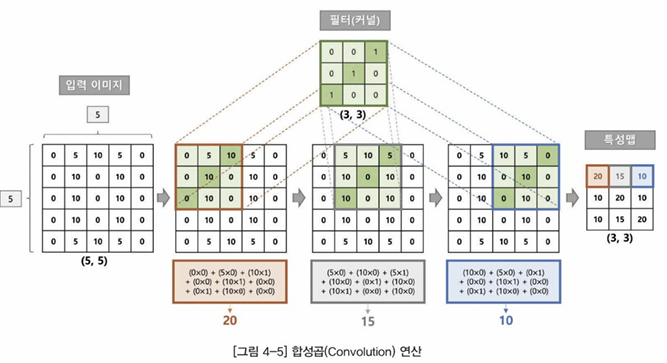

- 커널 사이즈가 3 X 3인 경우 총 9개의 가중치(weight)를 가짐
- 오차 역전파(back propagation)시 커널의 가중치 업데이트

- 합성곱 신경망이 이미지 특성 추출에 효율적인 이유: 커널의 공유 가중치(shared weights)
  - 오차 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트 하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적음

## 1-3. 채널

- 채널 : 입력 이미지를 구성하는 2차원 배열의 개수
  - 흑백 이미지 : 단일 채널
  - 컬러 이미지 : 3개의 채널 (R,G,B)

- 합성곱 연산에서 입력 이미지가 여러 개의 채널을 갖는 경우
  1. 입력 이미지의 채널 개수만큼 커널 생성
  2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행
  3. 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성
  4. element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성

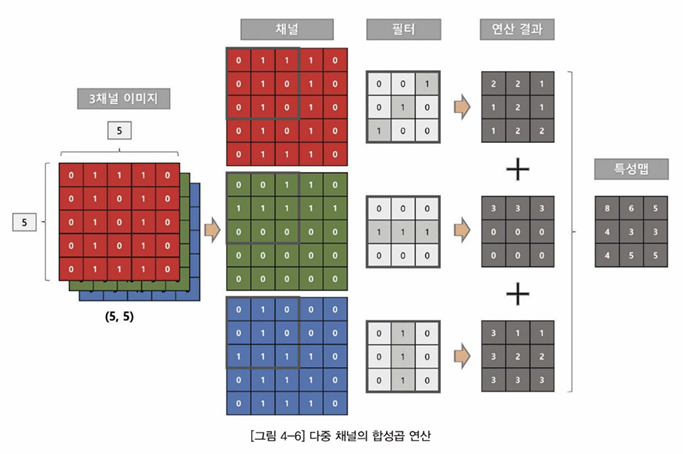

- 총 파라미터 개수 = (커널 사이즈 x 입력 채널 수 x 출력 필터 수) + bias

## 1-4. 스트라이드(stride)

- 스트라이드 : 커널이 이동하는 간격, 주로 1 또는 2로 설정
  - 스트라이드 1로 설정 : 커널은 우측으로 1픽셀씩 이동, 우측 끝까지 이동 후 아래 방향으로 1칸 좌측 첫번째 픽셀로 이동

## 1-5. 패딩(padding)

- 패딩 : 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 설정하는 것
  - zero-padding : 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출
  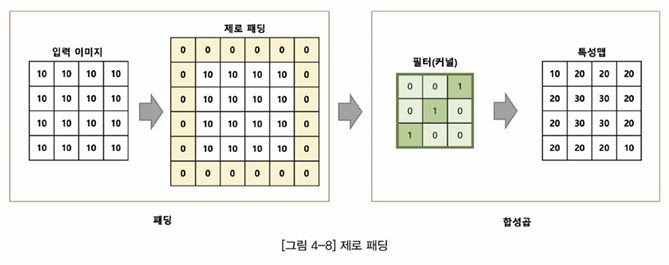

- 케라스의 Covn2D 레이어 : padding = 'same'으로 설정 시 zero-padding 적용

## 1-6. 특성맵(feature map) 사이즈

- 출력 데이터의 크기 구하는 식

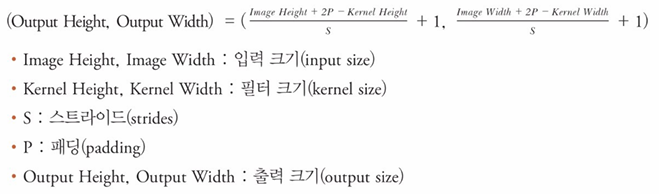

## 1-7. 풀링(pooling)

- 풀링 레이어 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
  - 장점 : 이미지 축소를 통해 연산량 감소 및 과대적합 방지
  - 최대 풀링(max pooling) : 주어진 커널의 크기에 대해 입력값의 최대값이 출력 값으로 선택됨
  - 평균 풀링(average pooling)

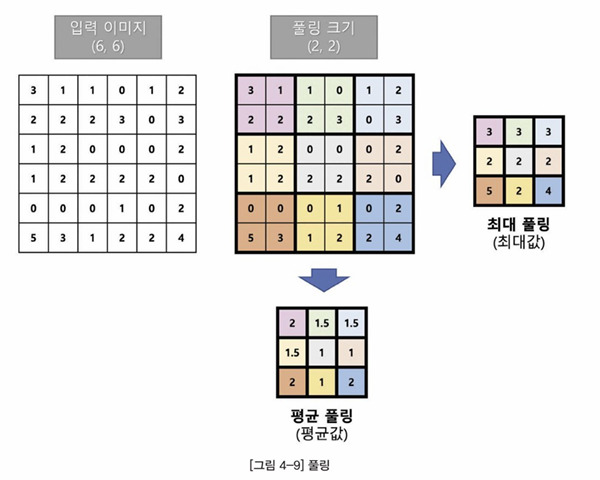

# 4-2. 간단한 모델 생성

## 2-1. 데이터 로드 및 전처리

In [1]:
!pip install --upgrade tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
# tensorflow 모듈 import
import tensorflow as tf

In [3]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


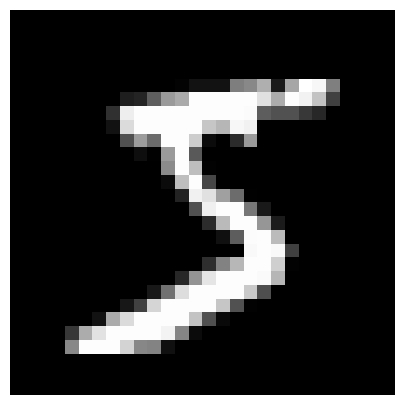

In [4]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [5]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [6]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- 딥러닝 모델의 안정적인 학습을 위해 입력 이미지 픽셀 값을 정규화

In [7]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


- CNN 모델에 색상을 나타내는 채널 추가
  - [] 안에 채널을 추가하고자 하는 위치에 'tf.newaxis' 작성
  - (60000, 28, 28) → (60000, 28, 28, 1)

## 2-2. Sequential API로 모델 생성 및 학습

- Sequential API 사용하여 합성곱 레이어 1개, 풀링 레이어 1개 적용하는 간단한 모델 생성

  - 합성곱은 Conv2D 레이어 사용 → (3,3) 크기의 서로 다른 32가지 종류의 커널 적용
  - 활성화 함수 : ReLU
  - 풀링 레이어 : (2,2) 크기로 최대 풀링 적용
  - 최종 분류기로 Dense 레이어 적용 → Flatten 층 추가, 노드 개수 10, 활성화 함수로 softmax

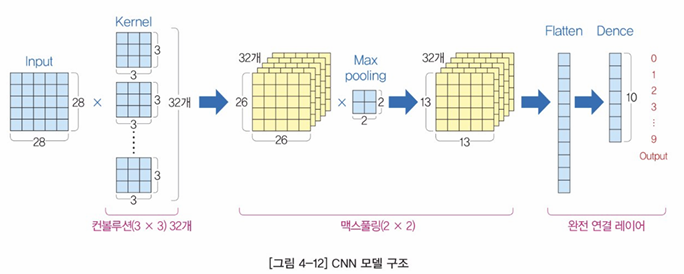

In [8]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2113 - accuracy: 0.9399 - val_loss: 0.0838 - val_accuracy: 0.9755
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0795 - accuracy: 0.9771 - val_loss: 0.0645 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0578 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0491 - accuracy: 0.9858 - val_loss: 0.0571 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0490 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0510 -

In [10]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 0.0592 - accuracy: 0.9820


[0.05920042842626572, 0.9819999933242798]

- evaluate() : 모델의 학습된 가중치를 사용하여 손실, 평가지표 계산
- 약 98%의 정확도

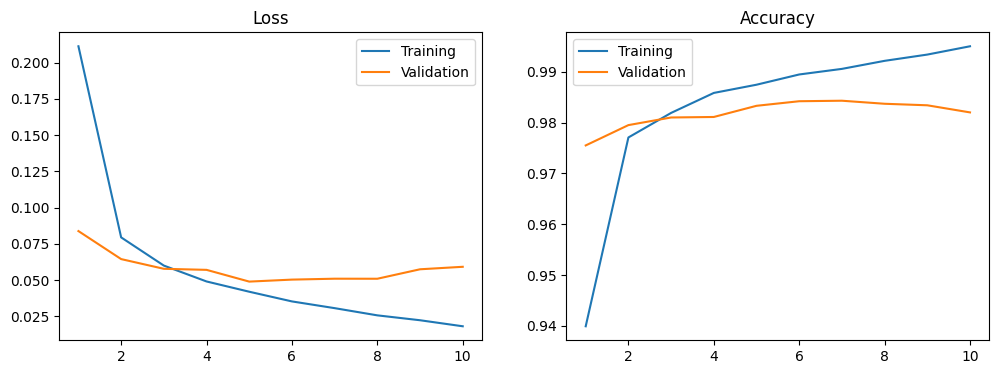

In [11]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

- 4 epoch 이후부터 모델 과대적합

## 2-3. 모델 구조 파악

In [12]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- summary() : 각 레이어의 이름, 출력 텐서의 형태, 각 레이어를 구성하는 파라미터 개수

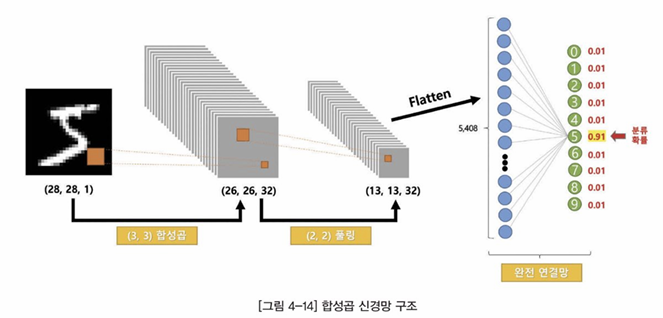

시작 : (28, 28, 1)
- Conv2D : 서로 다른 32개의 (3,3) 필터를 사용하여 가로, 세로 크기가 2씩 줄어듬  → (26, 26, 32)
- (2,2) 풀링 레이어 : 이미지 크기 1/2배 → (13, 13, 32)
- Flatten : 5,408 (13 x 13 x 32)

In [13]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어
model.layers

In [16]:
# 첫번째 레이어 선택
model.layers[0]

In [17]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.692378  , -0.18225706,  0.33415705, -0.00725682,
            0.5173111 , -0.7176408 , -0.481583  ,  0.02546355,
            0.128702  , -0.21545509, -0.72610337, -0.12951672,
            0.34782332,  0.26854   ,  0.35579458,  0.16930456,
           -0.08283564, -0.48406273,  0.18841927,  0.16241348,
           -0.21245083, -0.14048854, -0.8772458 , -0.03982373,
            0.18711448,  0.40565863,  0.25377673, -0.9983009 ,
           -1.330232  ,  0.10904928, -0.8402141 , -0.1174429 ]],
 
         [[ 0.36133364, -0.7939274 , -0.1560372 , -0.09660858,
            0.4701171 , -0.06204076, -0.0723348 ,  0.51559293,
            0.30101672, -0.3300027 , -0.58512485,  0.04051382,
            0.17020592, -0.4402004 ,  0.06984189, -0.12184688,
            0.61216146, -0.49692225,  0.23361033,  0.2180709 ,
            0.0249686 , -0.09936499,  0.23065938,  0.37046176,
            0.38131243,  0.05824713,  0.54

In [20]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.692378  , -0.18225706,  0.33415705, -0.00725682,
           0.5173111 , -0.7176408 , -0.481583  ,  0.02546355,
           0.128702  , -0.21545509, -0.72610337, -0.12951672,
           0.34782332,  0.26854   ,  0.35579458,  0.16930456,
          -0.08283564, -0.48406273,  0.18841927,  0.16241348,
          -0.21245083, -0.14048854, -0.8772458 , -0.03982373,
           0.18711448,  0.40565863,  0.25377673, -0.9983009 ,
          -1.330232  ,  0.10904928, -0.8402141 , -0.1174429 ]],

        [[ 0.36133364, -0.7939274 , -0.1560372 , -0.09660858,
           0.4701171 , -0.06204076, -0.0723348 ,  0.51559293,
           0.30101672, -0.3300027 , -0.58512485,  0.04051382,
           0.17020592, -0.4402004 ,  0.06984189, -0.12184688,
           0.61216146, -0.49692225,  0.23361033,  0.2180709 ,
           0.0249686 , -0.09936499,  0.23065938,  0.37046176,
           0.38131243,  0.05824713,  0.54589075, -0.321978

In [21]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00853298, -0.01624464, -0.37058404, -0.01328364,  0.00573697,
       -0.12779266,  0.00550564, -0.40113786, -0.26707554, -0.17062306,
       -0.07548954, -0.3346917 , -0.16054736, -0.21412754, -0.37646556,
       -0.30583695, -0.01652325, -0.20354809, -0.13901083, -0.31192434,
       -0.17015752, -0.24945311, -0.08495606, -0.31938922, -0.46691018,
       -0.4940064 , -0.08631061, -0.07733463,  0.18911895, -0.08123311,
       -0.1690639 , -0.0149818 ], dtype=float32)>

- layer[0]의 총 파라미터 수 = 288 + 32 = 320

In [22]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]] )
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 82ms/step


2

In [24]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

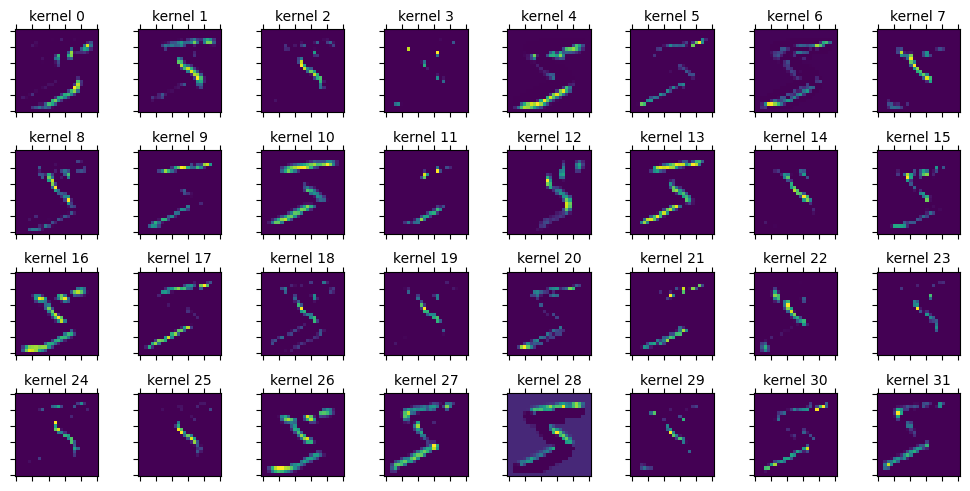

In [25]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


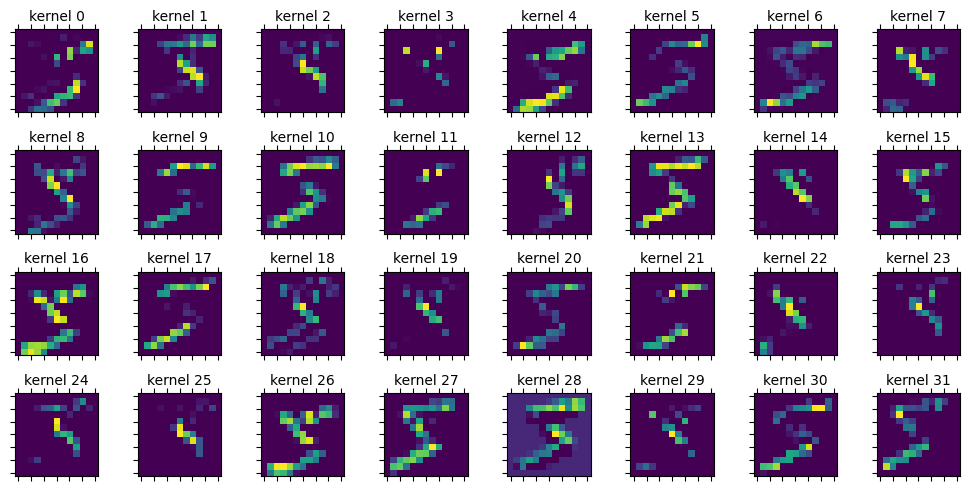

In [27]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# 4-3. 복잡한 모델 생성

- Functional API 사용하면 Sequential API로 구현할 수 없는 복잡한 구조의 모델 정의 가능
  - 입력이 2개 이상이거나, 출력이 2개 이상이 모델을 만들거나, 중간에 있는 레이어들을 건너뛰는 모델도 가능

## 3-1. 데이터셋 준비

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [30]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [32]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [33]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## 3-2. Functional API로 다중 입력, 다중 출력 레이어 생성

In [34]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

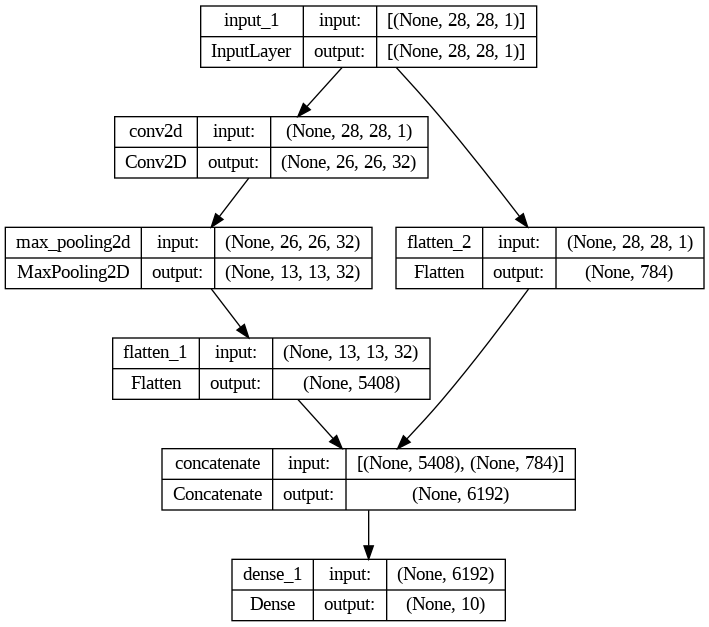

In [36]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2095 - accuracy: 0.9403 - val_loss: 0.0887 - val_accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0774 - accuracy: 0.9772 - val_loss: 0.0688 - val_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0701 - val_accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0555 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0405 - accuracy: 0.9880 - val_loss: 0.0551 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0638 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0533 -

## 3-3. 다중 출력 분류 모델

In [38]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


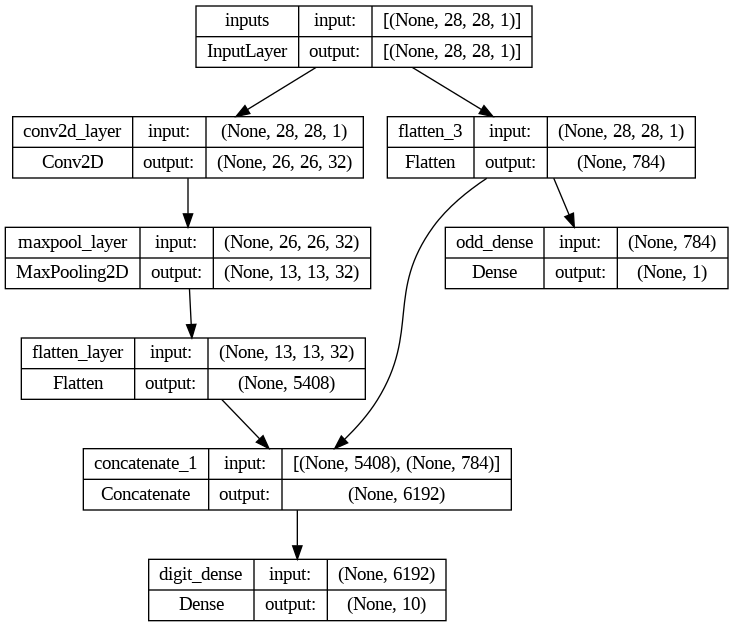

In [40]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [41]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'},
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd},
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3637 - digit_dense_loss: 0.2035 - odd_dense_loss: 0.3203 - digit_dense_accuracy: 0.9430 - odd_dense_accuracy: 0.8683 - val_loss: 0.2301 - val_digit_dense_loss: 0.0911 - val_odd_dense_loss: 0.2780 - val_digit_dense_accuracy: 0.9735 - val_odd_dense_accuracy: 0.8903
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2139 - digit_dense_loss: 0.0785 - odd_dense_loss: 0.2709 - digit_dense_accuracy: 0.9767 - odd_dense_accuracy: 0.8914 - val_loss: 0.2034 - val_digit_dense_loss: 0.0716 - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.9764 - val_odd_dense_accuracy: 0.8946
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1912 - digit_dense_loss: 0.0599 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9820 - odd_dense_accuracy: 0.8957 - val_loss: 0.1931 - val_digit_dense_loss: 0.0634 - val_odd_dense_loss: 0.2594 - val_digit_dense_accuracy: 0.9790 -

In [42]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 5ms/step - loss: 0.1932 - digit_dense_loss: 0.0652 - odd_dense_loss: 0.2560 - digit_dense_accuracy: 0.9815 - odd_dense_accuracy: 0.9021


[0.19322307407855988,
 0.0652325302362442,
 0.2559812366962433,
 0.9815000295639038,
 0.9021000266075134]

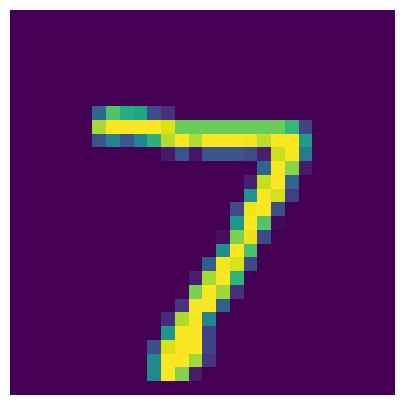

In [43]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [44]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 5ms/step
[2.2265256e-12 1.8103546e-10 7.1647088e-10 8.4751770e-07 9.1533864e-11
 8.9126829e-13 3.5673408e-20 9.9999911e-01 1.6215370e-08 9.4718082e-09]
[0.9996075]


In [45]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [47]:
odd_labels = (odd_preds>0.5).astype(np.int64).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

## 3-4. 전이 학습(Transfer Learning)

- 전이 학습 : 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념

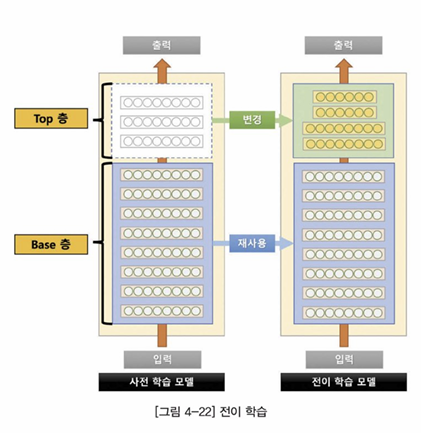

In [48]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


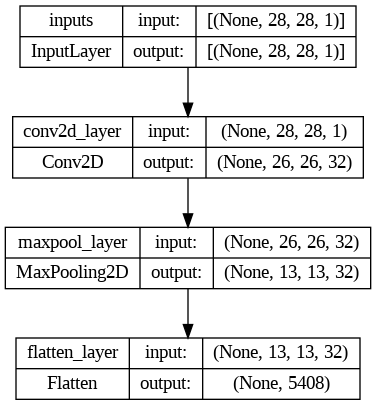

In [49]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [50]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


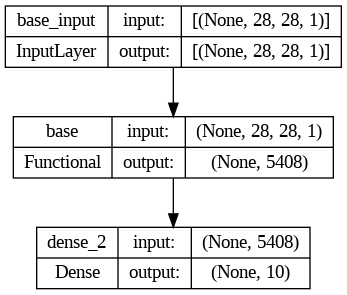

In [51]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [52]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 16ms/step - loss: 0.1301 - accuracy: 0.9635 - val_loss: 0.0730 - val_accuracy: 0.9772
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0575 - val_accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0577 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0576 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0528 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0535 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0615 -

In [53]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [54]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [55]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1160 - accuracy: 0.9687 - val_loss: 0.0603 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0352 - accuracy: 0.9901 - val_loss: 0.0559 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0274 - accuracy: 0.9919 - val_loss: 0.0549 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0604 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0548 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.0561 - val_ac

In [56]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [57]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [58]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1172 - accuracy: 0.9679 - val_loss: 0.0569 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.0470 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0359 - accuracy: 0.9897 - val_loss: 0.0484 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0472 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0554 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0489 - val_ac